In [1]:
%pylab inline
import tracpy
import tracpy.calcs
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as netCDF
import cmocean as cm
import tracpy.plotting
import cartopy.crs as ccrs
import cartopy.feature

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
loc = "http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

In [22]:
pc = ccrs.PlateCarree()
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def background(grid, proj=ccrs.Mercator(), ax=None, pars=np.arange(18, 35),
               mers=np.arange(-100, -80), figsize=None,
               hlevs=np.hstack(([10, 20], np.arange(50, 500, 50))),
               extent=[-98, -87.5, 22.8, 30.5],
               col='lightgrey', halpha=1, fig=None, outline=[1, 1, 0, 1],
               res='50m', plotstates=True, fontsize=14):
    """
    Plot basic TXLA shelf background: coastline, bathymetry, meridians, etc
    Can optionally input grid (so it doesn't have to be loaded again)

    Args:
        proj
        extent: west lon, east lon, south lat, north lat for axes bounds
        pars: parallels to plot
        mers: meridians to plot
        hlevs: which depth contours to plot
        outline: west, east, north, south lines (left, right, top, bottom)
        res: 10m, 50m, 110m
    """

    mpl.rcParams.update({'font.size': fontsize})#,'font.weight': 'bold'})
    
    land = cfeature.NaturalEarthFeature(category='physical', name='land',
                                            scale=res, facecolor='slategrey')
    states = cfeature.NaturalEarthFeature('cultural',
                                          name='admin_1_states_provinces_lines',
                                          scale=res,  facecolor='slategrey')

    if fig is None and figsize is None:
        fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
    elif fig is None and figsize is not None:
        fig = plt.figure(figsize=figsize, dpi=100)

    if ax is None:
        ax = fig.add_subplot(111, projection=proj)

    ax.set_extent(extent, pc)
    gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
    # the following two make the labels look like lat/lon format
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_bottom = False  # turn off labels where you don't want them
    gl.ylabels_right = False

    # plot isobaths
    ax.contour(grid.lon_rho, grid.lat_rho, grid.h, hlevs, colors='0.6',
               transform=pc, linewidths=0.1, alpha=halpha)

    # Do plot
    ax.add_feature(land, facecolor='lightgrey')
    ax.coastlines(resolution=res)  # coastline resolution options are '110m', '50m', '10m'
    if plotstates:
        ax.add_feature(states, edgecolor='0.2')
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='0.2')

    # Outline numerical domain
    # if outline:  # backward compatibility
    #     outline = [1,1,1,1]
    if outline[0]:  # left
        ax.plot(grid.lon_rho[:, 0], grid.lat_rho[:, 0], 'k:', transform=pc)
    if outline[1]:  # right
        ax.plot(grid.lon_rho[:, -1], grid.lat_rho[:, -1], 'k:', transform=pc)
    if outline[2]:  # top
        ax.plot(grid.lon_rho[-1, :], grid.lat_rho[-1, :], 'k:', transform=pc)
    if outline[3]:  # bottom
        ax.plot(grid.lon_rho[0, :], grid.lat_rho[0, :], 'k:', transform=pc)

    return fig, ax


## Freshwater regions

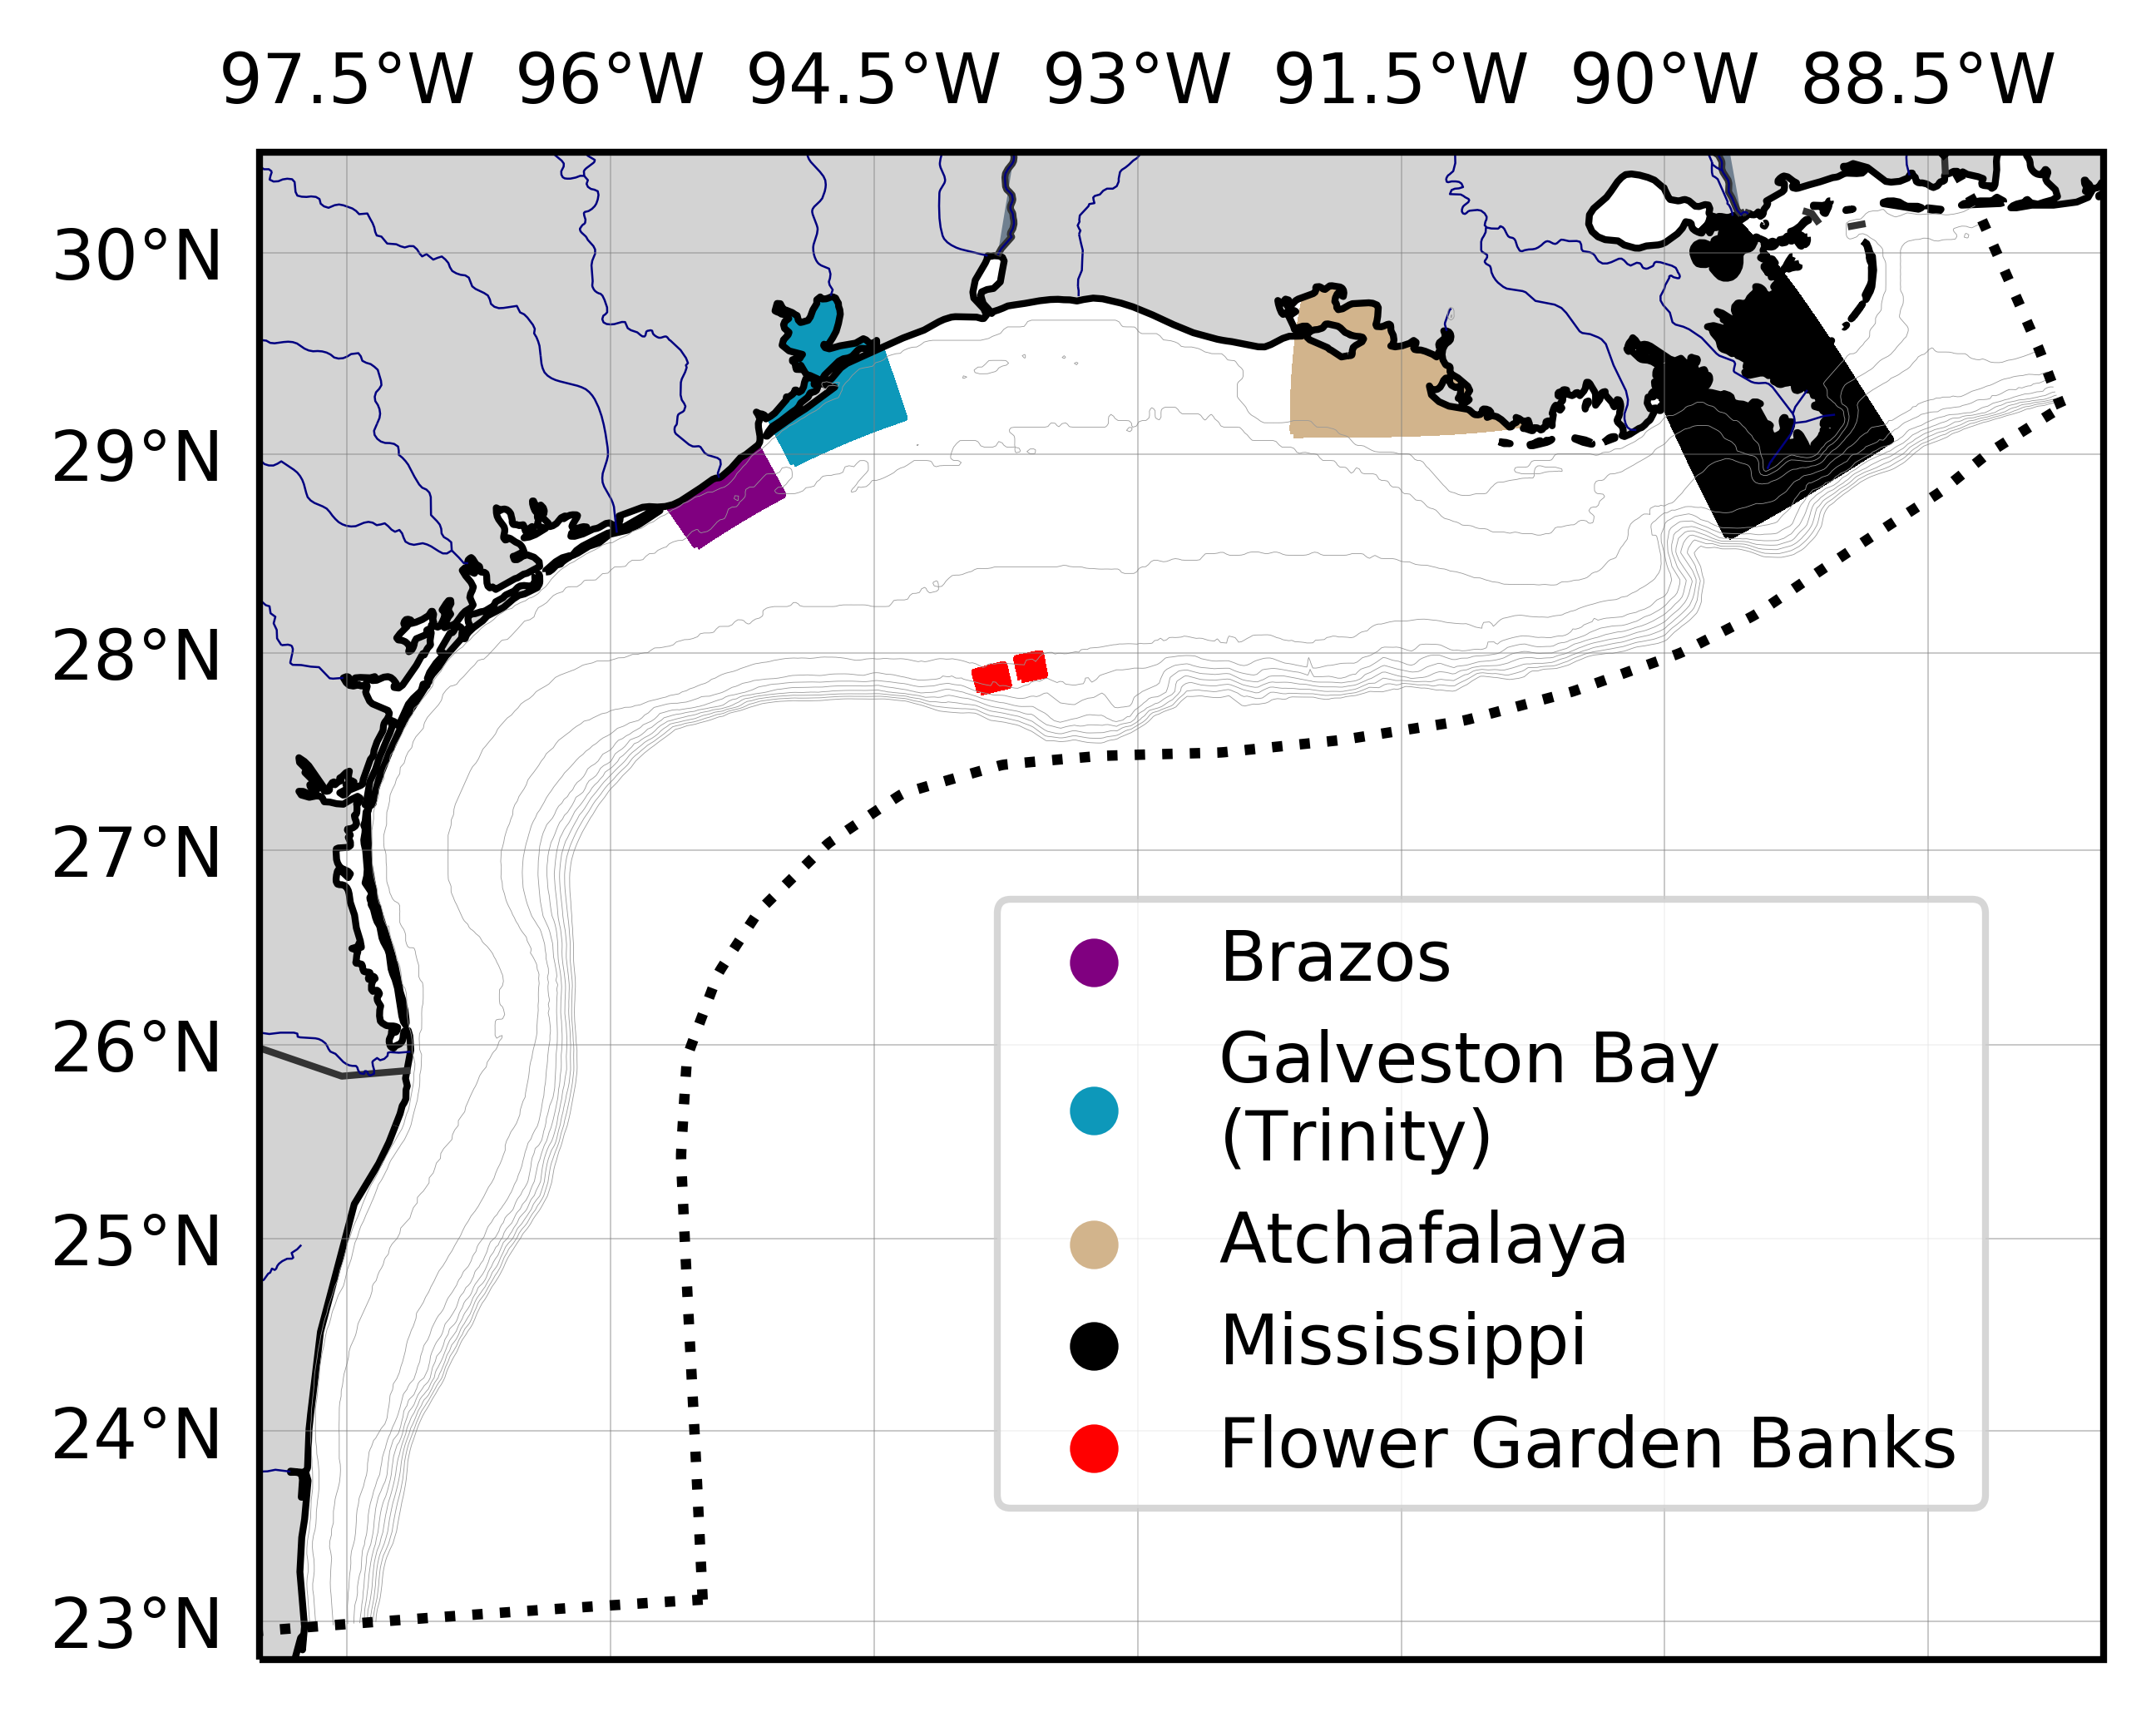

In [24]:
fig = plt.figure(figsize=(6,4),dpi=600)

ax = fig.add_subplot(111, projection=ccrs.Mercator())
fig,ax = background(grid, ax=ax, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
                           col='tan', halpha=1, outline=[1, 1, 0, 1], res='10m',
                           fontsize=10,proj=ccrs.Mercator()) 

ax.pcolormesh(grid.lon_rho[110:-1,400:500], grid.lat_rho[110:-1,400:500], grid.mask_rho[110:-1,400:500], color="tan",label="atch",transform=ccrs.PlateCarree());
ax.pcolormesh(grid.lon_rho[130:-1,230:255], grid.lat_rho[130:-1,230:255], grid.mask_rho[130:-1,230:255], color="purple", label="braz",transform=ccrs.PlateCarree());
ax.pcolormesh(grid.lon_rho[25:-1,550:615], grid.lat_rho[25:-1,550:615], grid.mask_rho[25:-1,550:615], color="black", label="miss",transform=ccrs.PlateCarree());
ax.pcolormesh(grid.lon_rho[140:-1,260:290], grid.lat_rho[140:-1,260:290], grid.mask_rho[140:-1,260:290], color="#0d98ba", label="trin/GB",transform=ccrs.PlateCarree());

ax.scatter(-95.378333, 29.875833, color="purple", label="Brazos",transform=ccrs.PlateCarree());
ax.scatter(-94.734787, 30.350359, color="#0d98ba", label="Galveston Bay\n(Trinity)",transform=ccrs.PlateCarree());
ax.scatter(-91.371944, 29.984722, color="tan", label="Atchafalaya",transform=ccrs.PlateCarree());
ax.scatter(-89.253333, 29.151111, color="black", label="Mississippi",transform=ccrs.PlateCarree());
ax.scatter(-95.378333, 29.875833, color="red", label="Flower Garden Banks",transform=ccrs.PlateCarree());

ax.pcolormesh(grid.lon_rho[26:34,286:297], grid.lat_rho[26:34,286:297], grid.mask_rho[26:34,286:297], color="red", label="West Bank",transform=ccrs.PlateCarree());
ax.pcolormesh(grid.lon_rho[27:35,301:310], grid.lat_rho[27:35,301:310], grid.mask_rho[27:35,301:310], color="red", label="East Bank",transform=ccrs.PlateCarree());
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='10m', edgecolor='navy', facecolor='none', linewidths=0.3))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m', edgecolor='navy', facecolor='none', linewidths=0.3))

ax.legend(loc=(0.4,0.1))
# tracpy.plotting.tracks(np.array(braz_clon[2016]),np.array(braz_clat[2016]),"test",grid,fig=fig,ax=ax)


In [6]:
atch_area = (grid.dxdy[110:-1,400:500].sum() - grid.mask[110:-1,400:500].sum()) / 1000000.
braz_area = (grid.dxdy[130:-1,230:255].sum() - grid.mask[130:-1,230:255].sum()) / 1000000.
miss_area = (grid.dxdy[25:-1,550:615].sum() - grid.mask[25:-1,550:615].sum()) / 1000000.
trin_area = (grid.dxdy[140:-1,260:290].sum() - grid.mask[140:-1,260:290].sum()) / 1000000.

## 2-D (surface) connectivity

In [25]:
atch_count_2d = np.zeros(23)
braz_count_2d = np.zeros(23)
miss_count_2d = np.zeros(23)
trin_count_2d = np.zeros(23)

years = np.arange(1994,2017)
days = np.arange(1,32)
for i,year in enumerate(years):

    for day in days:
        print(day,year)
        
        # Find all drifters for each day that pass through _________ river inlet
        
        fname = "tracks/%d/2d_July%d.nc" %(year,day)
        d = netCDF.Dataset(fname)
        lonp = d["lonp"][:]   # lonp[drifter,hour]
        latp = d["latp"][:]
        tp = d["tp"][:]
        
        ig,jg,t = tracpy.tools.interpolate2d(lonp,latp,grid,"d_ll2ij")
        
        atch = np.unique(np.argwhere((jg > 110) & (ig > 400) & (ig < 500) & (jg.mask != True) & (ig.mask != True))[:,0])
        braz = np.unique(np.argwhere((jg > 130) & (ig > 230) & (ig < 255) & (jg.mask != True) & (ig.mask != True))[:,0])
        miss = np.unique(np.argwhere((jg > 25) & (ig > 550) & (ig < 615) & (jg.mask != True) & (ig.mask != True))[:,0])
        trin = np.unique(np.argwhere((jg > 140) & (ig > 260) & (ig < 290) & (jg.mask != True) & (ig.mask != True))[:,0])
        
        atch_count_2d[i] += len(atch)
        braz_count_2d[i] += len(braz)
        miss_count_2d[i] += len(miss)
        trin_count_2d[i] += len(trin)

1 1994


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.6/site

2 1994
3 1994
4 1994
5 1994
6 1994
7 1994
8 1994
9 1994
10 1994
11 1994
12 1994
13 1994
14 1994
15 1994
16 1994
17 1994
18 1994
19 1994
20 1994
21 1994
22 1994
23 1994
24 1994
25 1994
26 1994
27 1994
28 1994
29 1994
30 1994
31 1994
1 1995
2 1995
3 1995
4 1995
5 1995
6 1995
7 1995
8 1995
9 1995
10 1995
11 1995
12 1995
13 1995
14 1995
15 1995
16 1995
17 1995
18 1995
19 1995
20 1995
21 1995
22 1995
23 1995
24 1995
25 1995
26 1995
27 1995
28 1995
29 1995
30 1995
31 1995
1 1996
2 1996
3 1996
4 1996
5 1996
6 1996
7 1996
8 1996
9 1996
10 1996
11 1996
12 1996
13 1996
14 1996
15 1996
16 1996
17 1996
18 1996
19 1996
20 1996
21 1996
22 1996
23 1996
24 1996
25 1996
26 1996
27 1996
28 1996
29 1996
30 1996
31 1996
1 1997
2 1997
3 1997
4 1997
5 1997
6 1997
7 1997
8 1997
9 1997
10 1997
11 1997
12 1997
13 1997
14 1997
15 1997
16 1997
17 1997
18 1997
19 1997
20 1997
21 1997
22 1997
23 1997
24 1997
25 1997
26 1997
27 1997
28 1997
29 1997
30 1997
31 1997
1 1998
2 1998
3 1998
4 1998
5 1998
6 1998
7 1998
8 

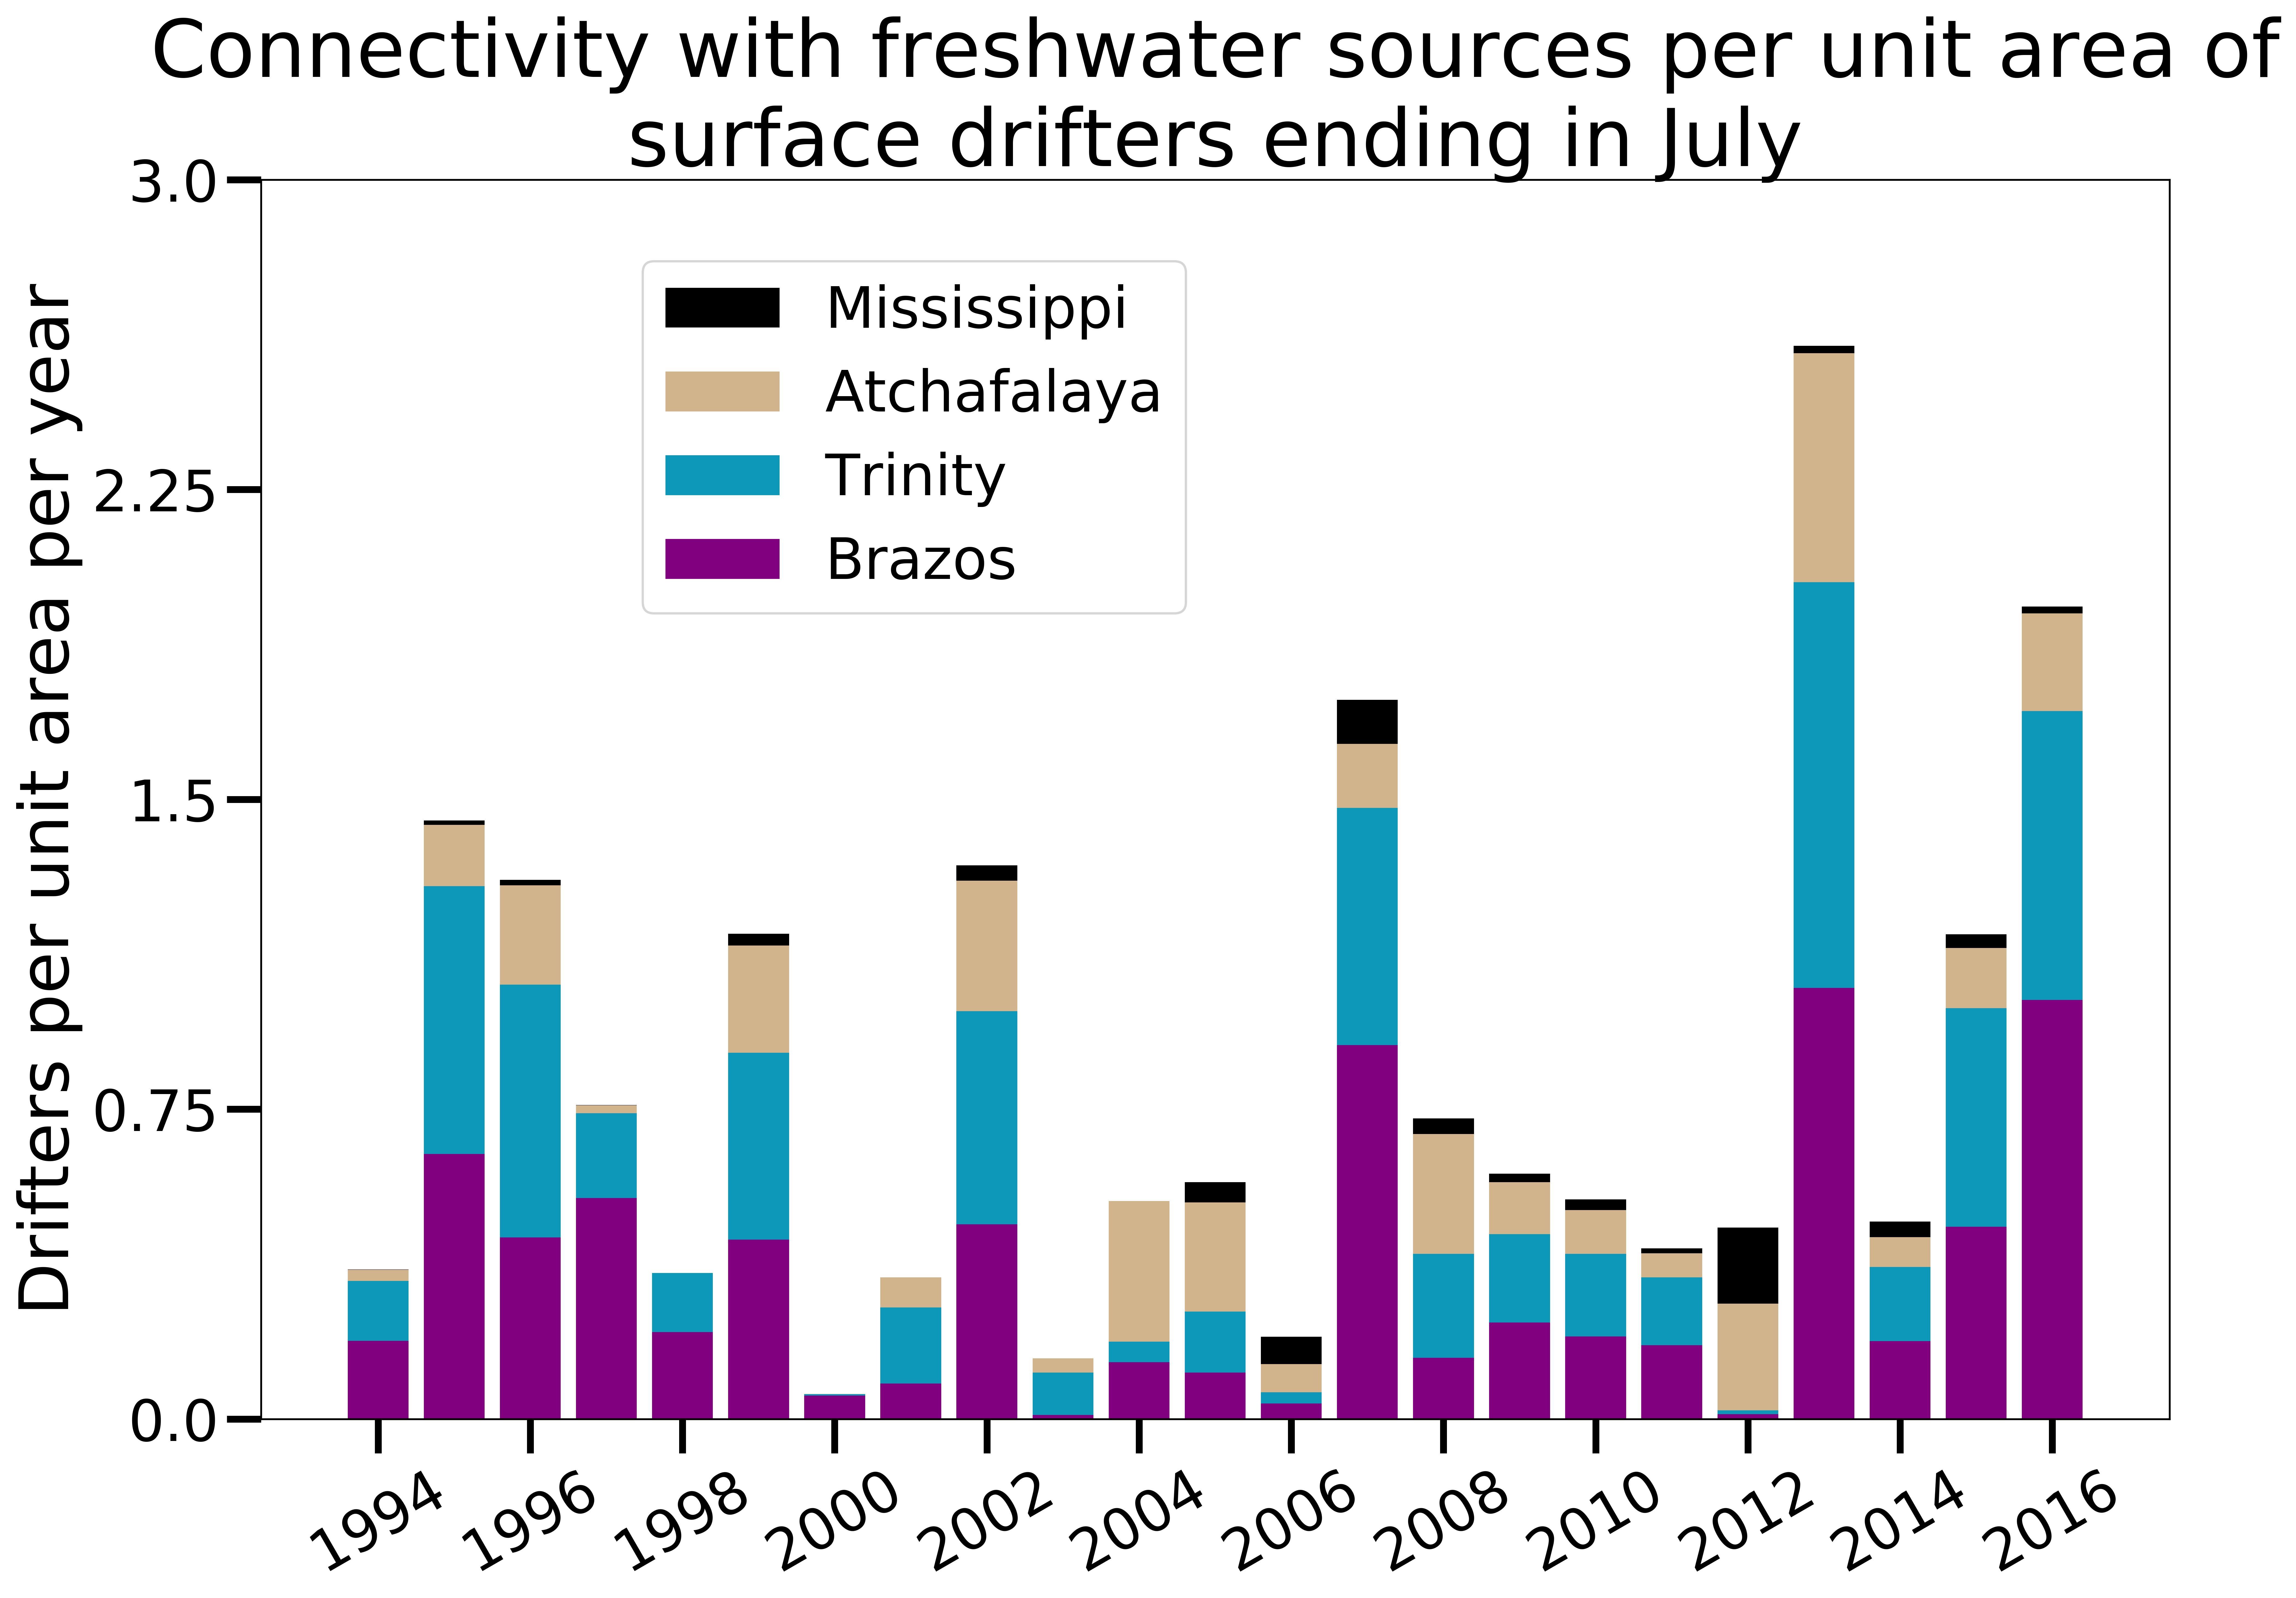

In [26]:
ind = np.arange(1994,2017)
width = 0.8
fig = plt.figure(figsize=(15,10),dpi=600)
fig.tight_layout()   

ax = fig.add_subplot(111)
    

pbraz = ax.bar(ind, braz_count_2d/braz_area, width, color="purple")
ptrin = ax.bar(ind, trin_count_2d/trin_area, width, bottom=braz_count_2d/braz_area,color="#0d98ba")
patch = ax.bar(ind, atch_count_2d/atch_area, width, bottom=braz_count_2d/braz_area + trin_count_2d/trin_area, color="tan")
pmiss = ax.bar(ind, miss_count_2d/miss_area, width, bottom=braz_count_2d/braz_area + trin_count_2d/trin_area + atch_count_2d/atch_area, color="black")

ax.set_ylabel(r'Drifters per unit area per year',fontsize=30)
ax.set_title('Connectivity with freshwater sources per unit area of\nsurface drifters ending in July', fontsize=35)
ax.set_xticks(np.arange(1994,2017,2))
ax.set_xticklabels(np.arange(1994,2017,2),rotation=30, fontsize=25)
ax.set_yticks(np.linspace(0,3,5))
ax.set_yticklabels(np.linspace(0,3,5), fontsize=25)
ax.tick_params(direction='out', length=15, width=3, grid_alpha=0.5)

ax.legend((pmiss[0], patch[0], ptrin[0], pbraz[0]  ), ("Mississippi","Atchafalaya","Trinity", "Brazos"),
         loc=(0.2,0.65),prop={'size': 25})

## 3-D connectivity

In [10]:
atch_count = np.zeros(23)
braz_count = np.zeros(23)
miss_count = np.zeros(23)
trin_count = np.zeros(23)

years = np.arange(1994,2017)
days = np.arange(1,32)
for i,year in enumerate(years):

    for day in days:
        print(day,year)
        
        # Find all drifters for each day that pass through _________ river inlet
        
        fname = "tracks/%d/3d_July%d.nc" %(year,day)
        d = netCDF.Dataset(fname)
        lonp = d["lonp"][:]   # lonp[drifter,hour]
        latp = d["latp"][:]
        tp = d["tp"][:]
        
        ig,jg,t = tracpy.tools.interpolate2d(lonp,latp,grid,"d_ll2ij")
        
        atch = np.unique(np.argwhere((jg > 110) & (ig > 400) & (ig < 500) & (jg.mask != True) & (ig.mask != True))[:,0])
        braz = np.unique(np.argwhere((jg > 130) & (ig > 230) & (ig < 255) & (jg.mask != True) & (ig.mask != True))[:,0])
        miss = np.unique(np.argwhere((jg > 25) & (ig > 550) & (ig < 615) & (jg.mask != True) & (ig.mask != True))[:,0])
        trin = np.unique(np.argwhere((jg > 140) & (ig > 260) & (ig < 290) & (jg.mask != True) & (ig.mask != True))[:,0])
        
        atch_count[i] += len(atch)
        braz_count[i] += len(braz)
        miss_count[i] += len(miss)
        trin_count[i] += len(trin)

1 1994


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.6/site

2 1994
3 1994
4 1994
5 1994
6 1994
7 1994
8 1994
9 1994
10 1994
11 1994
12 1994
13 1994
14 1994
15 1994
16 1994
17 1994
18 1994
19 1994
20 1994
21 1994
22 1994
23 1994
24 1994
25 1994
26 1994
27 1994
28 1994
29 1994
30 1994
31 1994
1 1995
2 1995
3 1995
4 1995
5 1995
6 1995
7 1995
8 1995
9 1995
10 1995
11 1995
12 1995
13 1995
14 1995
15 1995
16 1995
17 1995
18 1995
19 1995
20 1995
21 1995
22 1995
23 1995
24 1995
25 1995
26 1995
27 1995
28 1995
29 1995
30 1995
31 1995
1 1996
2 1996
3 1996
4 1996
5 1996
6 1996
7 1996
8 1996
9 1996
10 1996
11 1996
12 1996
13 1996
14 1996
15 1996
16 1996
17 1996
18 1996
19 1996
20 1996
21 1996
22 1996
23 1996
24 1996
25 1996
26 1996
27 1996
28 1996
29 1996
30 1996
31 1996
1 1997
2 1997
3 1997
4 1997
5 1997
6 1997
7 1997
8 1997
9 1997
10 1997
11 1997
12 1997
13 1997
14 1997
15 1997
16 1997
17 1997
18 1997
19 1997
20 1997
21 1997
22 1997
23 1997
24 1997
25 1997
26 1997
27 1997
28 1997
29 1997
30 1997
31 1997
1 1998
2 1998
3 1998
4 1998
5 1998
6 1998
7 1998
8 

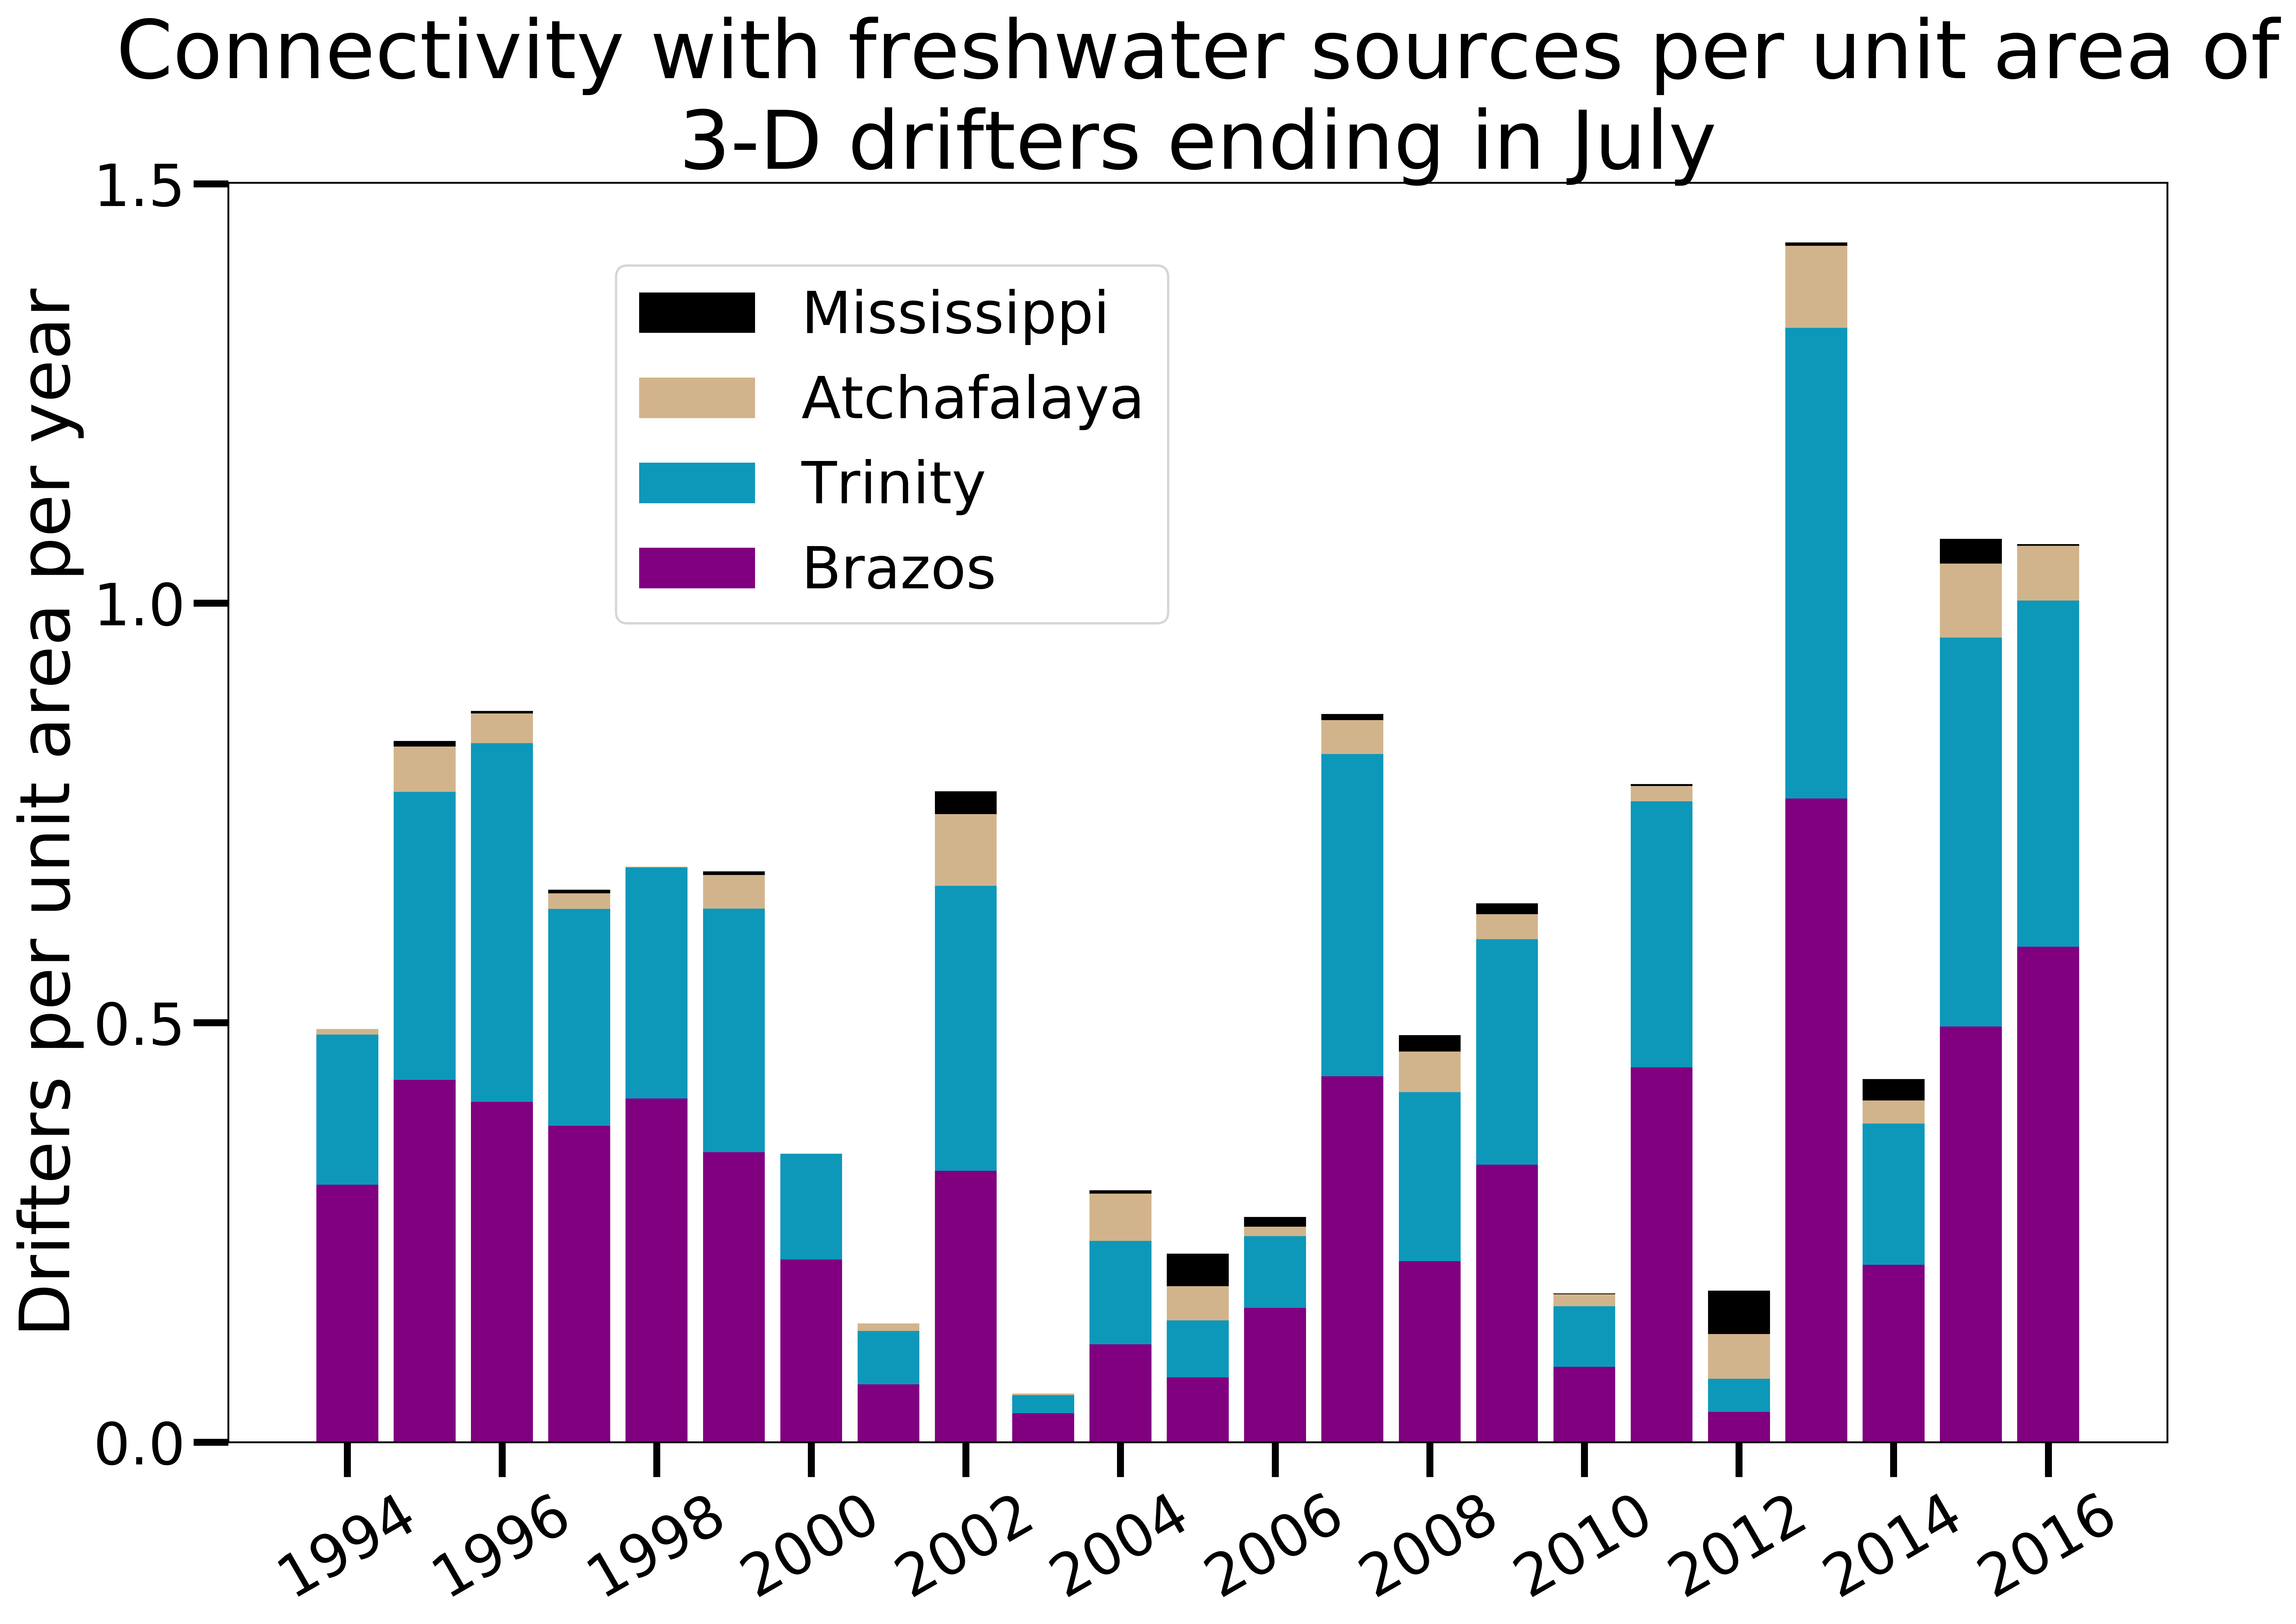

In [15]:
ind = np.arange(1994,2017)
width = 0.8
fig = plt.figure(figsize=(15,10),dpi=600)
fig.tight_layout()   

ax = fig.add_subplot(111)

pbraz_3d = ax.bar(ind, braz_count/braz_area, width, color="purple")
ptrin_3d = ax.bar(ind, trin_count/trin_area, width, bottom=braz_count/braz_area,color="#0d98ba")
patch_3d = ax.bar(ind, atch_count/atch_area, width, bottom=braz_count/braz_area + trin_count/trin_area, color="tan")
pmiss_3d = ax.bar(ind, miss_count/miss_area, width, bottom=braz_count/braz_area + trin_count/trin_area + atch_count/atch_area, color="black")

ax.set_ylabel(r'Drifters per unit area per year',fontsize=30)
ax.set_title('Connectivity with freshwater sources per unit area of\n3-D drifters ending in July', fontsize=35)
ax.set_xticks(np.arange(1994,2017,2))
ax.set_xticklabels(np.arange(1994,2017,2),rotation=30, fontsize=25)
ax.set_yticks(np.linspace(0,1.5,4))
ax.set_yticklabels(np.linspace(0,1.5,4), fontsize=25)
ax.tick_params(direction='out', length=15, width=3, grid_alpha=0.5)

ax.legend((pmiss_3d[0], patch_3d[0], ptrin_3d[0], pbraz_3d[0]  ), ("Mississippi","Atchafalaya","Trinity", "Brazos"),
         loc=(0.2,0.65),prop={'size': 25})
